In [16]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

# VaR using Variance-Covariance Method

In [19]:
class CovMatrixVaREngine:
    def __init__(self, asset_returns, weights, portfolio_value, confidence=0.99, horizon=1):
        self.asset_returns = asset_returns  # DataFrame: rows=time, cols=assets
        self.weights = np.array(weights)
        self.portfolio_value = portfolio_value
        self.confidence = confidence
        self.horizon = horizon

    def compute_cov_matrix(self):
        return self.asset_returns.cov()

    def compute_portfolio_vol(self):
        cov_matrix = self.compute_cov_matrix()
        port_var = np.dot(self.weights.T, np.dot(cov_matrix, self.weights))
        return np.sqrt(port_var)

    def compute_var(self):
        z_score = norm.ppf(1 - self.confidence)
        port_vol = self.compute_portfolio_vol()
        var_amount = -z_score * port_vol * np.sqrt(self.horizon) * self.portfolio_value
        return var_amount

    def visualize_correlation(self):
        corr = self.asset_returns.corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
                    linewidths=0.5, linecolor='gray', square=True, cbar=True)
        plt.title('Asset Correlation Matrix', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

# Simulate daily returns for 3 assets over 250 days

💥 1-Day VaR at 99% confidence: $199,667


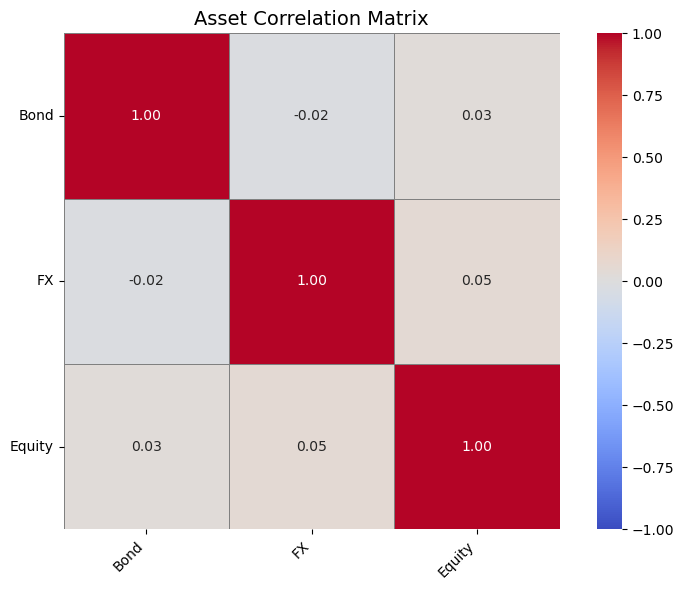

In [22]:
np.random.seed(42)
returns = pd.DataFrame({
    'Bond': np.random.normal(0.0002, 0.01, 250),
    'FX': np.random.normal(0.0001, 0.015, 250),
    'Equity': np.random.normal(0.0003, 0.02, 250)
})

weights = [0.4, 0.3, 0.3]  # Portfolio allocation
portfolio_value = 10_000_000

engine = CovMatrixVaREngine(returns, weights, portfolio_value, confidence=0.99)
var = engine.compute_var()

print(f"💥 1-Day VaR at 99% confidence: ${var:,.0f}")
engine.visualize_correlation()